In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os

IMAGES_DIR = "../images"
OUTPUTS_DIR = "../outputs"

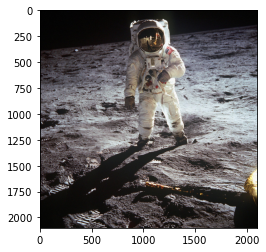

In [3]:
im1 = cv2.imread(os.path.join(IMAGES_DIR, 'moon.jpg'))
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
plt.imshow(im1, cmap="gray")
plt.show()

## Finding Edges from Depth Map

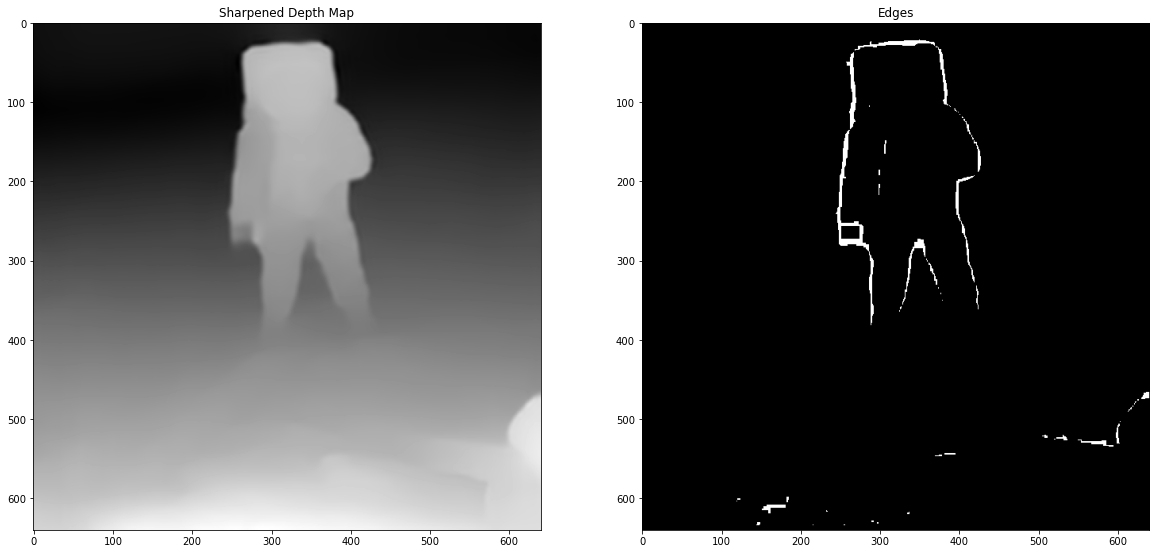

In [10]:
im1_depth = np.load(os.path.join(OUTPUTS_DIR, './moon.npy'))

# sharpening using bilateral filter
im1_depth = cv2.bilateralFilter(im1_depth, 7, 4, 0.5)
im1_depth = cv2.normalize(im1_depth,None,0,255,cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im1_depth, cmap="gray")
plt.title("Sharpened Depth Map")

# finding edges
shift = 1
upshift = im1_depth[:-shift, :] - im1_depth[shift:, :]
downshift = im1_depth[shift:, :] - im1_depth[:-shift, :]
leftshift = im1_depth[:, :-shift] - im1_depth[:, shift:]
rightshift = im1_depth[:, shift:] - im1_depth[:, :-shift]

upshift = np.vstack((upshift, np.zeros((shift, im1_depth.shape[1]))))
downshift = np.vstack((np.zeros((shift, im1_depth.shape[1])), downshift))
leftshift = np.hstack((leftshift, np.zeros((im1_depth.shape[0], shift))))
rightshift = np.hstack((np.zeros((im1_depth.shape[0], shift)), rightshift))

kernel_size = 7
kernel = np.ones((kernel_size, kernel_size), np.uint8)
leftshift = cv2.morphologyEx(leftshift, cv2.MORPH_OPEN, kernel)
rightshift = cv2.morphologyEx(rightshift, cv2.MORPH_OPEN, kernel)
upshift = cv2.morphologyEx(upshift, cv2.MORPH_OPEN, kernel)
downshift = cv2.morphologyEx(downshift, cv2.MORPH_OPEN, kernel)

edges_tmp = np.logical_or(leftshift, rightshift)
edges_tmp = np.logical_or(edges_tmp, upshift)
edges_tmp = np.logical_or(edges_tmp, downshift)
edges_tmp = 255 * edges_tmp.astype(np.uint8)

kernel = np.ones((9,9), np.uint8)
depth_edges = cv2.erode(edges_tmp, kernel, iterations=1)

plt.subplot(122)
plt.imshow(depth_edges, cmap="gray")
plt.title("Edges")          
plt.show()